In [220]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score

import xgboost as xgb



#got dataset from here https://www.kaggle.com/bobbyscience/league-of-legends-diamond-ranked-games-10-min

In [210]:
df = pd.read_csv('league.csv')
pd.set_option('display.max_columns', 40)
df

,gameId,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,blueHeralds,blueTowersDestroyed,blueTotalGold,blueAvgLevel,blueTotalExperience,blueTotalMinionsKilled,blueTotalJungleMinionsKilled,blueGoldDiff,blueExperienceDiff,blueCSPerMin,blueGoldPerMin,redWardsPlaced,redWardsDestroyed,redFirstBlood,redKills,redDeaths,redAssists,redEliteMonsters,redDragons,redHeralds,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
0,4519157822,0,28,2,1,9,6,11,0,0,0,0,17210,6.6,17039,195,36,643,-8,19.5,1721.0,15,6,0,6,9,8,0,0,0,0,16567,6.8,17047,197,55,-643,8,19.7,1656.7
1,4523371949,0,12,1,0,5,5,5,0,0,0,0,14712,6.6,16265,174,43,-2908,-1173,17.4,1471.2,12,1,1,5,5,2,2,1,1,1,17620,6.8,17438,240,52,2908,1173,24.0,1762.0
2,4521474530,0,15,0,0,7,11,4,1,1,0,0,16113,6.4,16221,186,46,-1172,-1033,18.6,1611.3,15,3,1,11,7,14,0,0,0,0,17285,6.8,17254,203,28,1172,1033,20.3,1728.5
3,4524384067,0,43,1,0,4,5,5,1,0,1,0,15157,7.0,17954,201,55,-1321,-7,20.1,1515.7,15,2,1,5,4,10,0,0,0,0,16478,7.0,17961,235,47,1321,7,23.5,1647.8
4,4436033771,0,75,4,0,6,6,6,0,0,0,0,16400,7.0,18543,210,57,-1004,230,21.0,1640.0,17,2,1,6,6,7,1,1,0,0,17404,7.0,18313,225,67,1004,-230,22.5,1740.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9874,4527873286,1,17,2,1,7,4,5,1,1,0,0,17765,7.2,18967,211,69,2519,2469,21.1,1776.5,46,3,0,4,7,7,0,0,0,0,15246,6.8,16498,229,34,-2519,-2469,22.9,1524.6
9875,4527797466,1,54,0,0,6,4,8,1,1,0,0,16238,7.2,19255,233,48,782,888,23.3,1623.8,12,21,1,4,6,3,0,0,0,0,15456,7.0,18367,206,56,-782,-888,20.6,1545.6
9876,4527713716,0,23,1,0,6,7,5,0,0,0,0,15903,7.0,18032,210,45,-2416,-1877,21.0,1590.3,14,0,1,7,6,11,1,1,0,0,18319,7.4,19909,261,60,2416,1877,26.1,1831.9
9877,4527628313,0,14,4,1,2,3,3,1,1,0,0,14459,6.6,17229,224,48,-839,-1085,22.4,1445.9,66,4,0,3,2,1,0,0,0,0,15298,7.2,18314,247,40,839,1085,24.7,1529.8


In [127]:
percent_missing = df.isnull().sum() * 100 / len(df)
missing_value_df = pd.DataFrame({'column_name': df.columns,
                                 'percent_missing': percent_missing})

missing_value_df.reset_index(inplace = True)

missing_value_df

#none of the columns are missing any, which is very good! we don't have bad data.

,index,column_name,percent_missing
0,gameId,gameId,0.0
1,blueWins,blueWins,0.0
2,blueWardsPlaced,blueWardsPlaced,0.0
3,blueWardsDestroyed,blueWardsDestroyed,0.0
4,blueFirstBlood,blueFirstBlood,0.0
...,...,...,...
35,redTotalJungleMinionsKilled,redTotalJungleMinionsKilled,0.0
36,redGoldDiff,redGoldDiff,0.0
37,redExperienceDiff,redExperienceDiff,0.0
38,redCSPerMin,redCSPerMin,0.0


0    4949
1    4930
Name: blueWins, dtype: int64

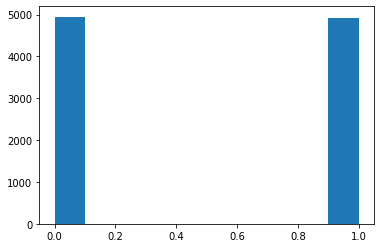

In [128]:
#we are going to see which side wins more often, but it clearly looks like the number of wins on each side is about equal
#it looks like the red side wins a little bit more with 4949 and the blue side with 4930
plt.hist(df['blueWins'])

df['blueWins'].value_counts()


In [129]:
#EDA I want to see the different type of variables that change when the blue side wins vs when they loose

pd.set_option('max_columns', None)
grouped = df.drop(columns = "gameId").groupby('blueWins').mean()


#With this we can see which variables effect a high elo gameplay more than a low elo. For example, the vairable
#blueWardsPlaced represents how many wards are placed in a game, and in our case the mean wards placed in the blue side
#is about 22 wards, which is alot of ward. But if you were to compare that to a lower elo, that average would be much 
#much lower, since lower elo players do not really care about vision, and really care more about superficial variables like
#kda.


grouped

,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,blueHeralds,blueTowersDestroyed,blueTotalGold,blueAvgLevel,blueTotalExperience,blueTotalMinionsKilled,blueTotalJungleMinionsKilled,blueGoldDiff,blueExperienceDiff,blueCSPerMin,blueGoldPerMin,redWardsPlaced,redWardsDestroyed,redFirstBlood,redKills,redDeaths,redAssists,redEliteMonsters,redDragons,redHeralds,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
blueWins,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,22.286725,2.728834,0.404122,5.170135,7.131138,5.522732,0.411396,0.259446,0.151950,0.023237,15864.111134,6.807032,17453.47161,211.793090,49.211154,-1237.066680,-971.898969,21.179309,1586.411113,22.804001,2.841382,0.595878,7.131138,5.170135,7.760558,0.711659,0.516064,0.195595,0.065468,17101.177814,7.032613,18425.370580,221.989089,52.423924,1237.066680,971.898969,22.198909,1710.117781
1,22.289858,2.921298,0.605882,7.201623,5.140365,7.771805,0.689047,0.464909,0.224138,0.079716,17145.263895,7.025396,18404.57789,221.624949,51.813185,1270.718053,908.274442,22.162495,1714.526389,21.930223,2.604462,0.394118,5.140365,7.201623,5.559432,0.434077,0.309736,0.124341,0.020487,15874.545842,6.817606,17496.303448,212.691481,50.197972,-1270.718053,-908.274442,21.269148,1587.454584


<p>Now I want to see which absolute difference for the averages are the biggest. This is to show which values have
the biggest absolute difference when blue team wins and when blue team loses, so that I can determine which factors
    might affect the chances of them winning or losing.</p>

In [130]:

pd.set_option('display.max_rows', 38)
abs(grouped.iloc[0]-grouped.iloc[1]).to_frame().sort_values(by = 0,ascending = False).rename(columns = {0:"abs diff"})

,abs diff
blueGoldDiff,2507.784733
redGoldDiff,2507.784733
blueExperienceDiff,1880.173412
redExperienceDiff,1880.173412
blueTotalGold,1281.152761
redTotalGold,1226.631972
blueTotalExperience,951.106280
redTotalExperience,929.067132
blueGoldPerMin,128.115276
redGoldPerMin,122.663197


It looks like these are the variable with an absolute difference of means that are greater than 8. 'blueGoldDiff','blueExperienceDiff','redDragons','blueDragons','blueHeralds','redHeralds',
                 'blueTowersDestroyed','redTowersDestroyed','redKills','blueKills',d.

I chose 8 as my number because I do not want to overfit my model with too many features, so I want to limit the number of dimensions that my model has. Moreover, I will not use all of these features since some of them might relate to the other. For example, blueGoldDiff and redGoldDiff are the same variable since they are the difference in gold. 


Now I will split my data up into training and testing, and fit several models. But first, I will create my baseline model.

In [248]:
cleaned_df = df[['blueGoldDiff','blueExperienceDiff','redDragons','blueDragons','blueHeralds','redHeralds',
                 'blueTowersDestroyed','redTowersDestroyed','redKills','blueKills','blueWins']]

display(cleaned_df)

,blueGoldDiff,blueExperienceDiff,redDragons,blueDragons,blueHeralds,redHeralds,blueTowersDestroyed,redTowersDestroyed,redKills,blueKills,blueWins
0,643,-8,0,0,0,0,0,0,6,9,0
1,-2908,-1173,1,0,0,1,0,1,5,5,0
2,-1172,-1033,0,1,0,0,0,0,11,7,0
3,-1321,-7,0,0,1,0,0,0,5,4,0
4,-1004,230,1,0,0,0,0,0,6,6,0
...,...,...,...,...,...,...,...,...,...,...,...
9874,2519,2469,0,1,0,0,0,0,4,7,1
9875,782,888,0,1,0,0,0,0,4,6,1
9876,-2416,-1877,1,0,0,0,0,0,7,6,0
9877,-839,-1085,0,1,0,0,0,0,3,2,0


C:\Users\Jason Chau\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


Index(['BlueWins', 'RedWins'], dtype='object', name='blueWins')


<Figure size 1440x720 with 0 Axes>

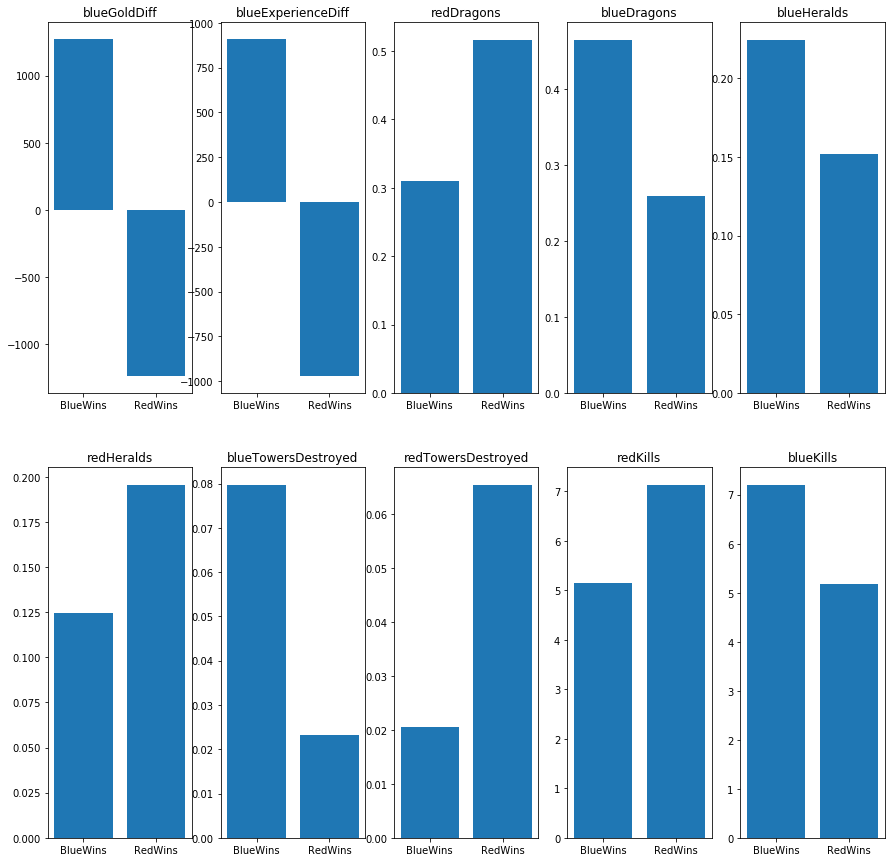

In [221]:
stats_df = df[['blueGoldDiff','blueExperienceDiff','redDragons','blueDragons','blueHeralds','redHeralds',
                 'blueTowersDestroyed','redTowersDestroyed','redKills','blueKills',
               'blueWins']]

stats_df['blueWins'] = stats_df['blueWins'].replace(1, 'BlueWins').replace(0, 'RedWins')

statistics = stats_df.groupby(['blueWins']).mean()

plt.figure(figsize=(20, 10))
print(statistics.index)
fig, axs = plt.subplots(2,5,figsize=(15,15))
count = 1
row = 0
col = 0
for x in statistics.columns:
    count+=1
    if col == 5:
        row = 1
        col = 0

    axs[row,col].bar(statistics.index, statistics[x])
    axs[row,col].set_title(x)
    col += 1



Now the averages are pretty close to each other, but to make sure I want to get rid of the outliers. Since these outliers can skew my data, cause impact to my mean, and impact to std. I am going to remove the outliers with something called the z-score. If any of the datapoints have a z-score of greater than a three, I will classify it as an outlier. However, I do not think that it is necessary to remove outlier's from certain columns. For example, the categories: redTotalGold and blueTotalGold are something that might have huge outliers because the amount of gold gained depends on the length of the game. For example, if the length of the game is 50 minutes, the total gold gained by both teams would be significantly more than a game that takes two minutes. So  I will focus removing outliers from  only  blueGoldDiff and blueExperienceDiff, which are the difference of gold and expererience between the two teams

In [133]:
#function to determine outliers.
def detect_outlier(data_1):
    outliers = []
    threshold=3
    mean_1 = np.mean(data_1)
    std_1 =np.std(data_1)
    
    
    for y in data_1:
        z_score= (y - mean_1)/std_1 
        if np.abs(z_score) > threshold:
            outliers.append(y)
    return outliers

In [245]:
def remove_outlier(column,df):
    
    outliers = detect_outlier(df[column])
    df['is_outlier'] = df[column].apply(lambda x: True if x in outliers else False)
    df = df[cleaned_df['is_outlier'] == False]
    df = df.drop(columns = ['is_outlier'])
    return df

In [273]:
cleaned_df = df[['blueGoldDiff','blueExperienceDiff','redDragons','blueDragons','blueHeralds','redHeralds',
                 'blueTowersDestroyed','redTowersDestroyed','redKills','blueKills','blueWins']]

cols_w_outliers = ['blueGoldDiff','blueExperienceDiff','redKills','blueKills','blueTowersDestroyed','redTowersDestroyed']
for x in cols_w_outliers:
    print(x)
    cleaned_df = remove_outlier(x,cleaned_df)


cleaned_df['blueWins'] = cleaned_df['blueWins'].replace(1, 'BlueWins').replace(0, 'RedWins')
y = cleaned_df['blueWins']

cleaned_df = cleaned_df.drop(columns = ['blueWins'])


blueGoldDiff
blueExperienceDiff
redKills
blueKills
blueTowersDestroyed
redTowersDestroyed


C:\Users\Jason Chau\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [274]:
cleaned_df

,blueGoldDiff,blueExperienceDiff,redDragons,blueDragons,blueHeralds,redHeralds,blueTowersDestroyed,redTowersDestroyed,redKills,blueKills
0,643,-8,0,0,0,0,0,0,6,9
2,-1172,-1033,0,1,0,0,0,0,11,7
3,-1321,-7,0,0,1,0,0,0,5,4
4,-1004,230,1,0,0,0,0,0,6,6
5,698,101,0,1,0,0,0,0,3,5
...,...,...,...,...,...,...,...,...,...,...
9874,2519,2469,0,1,0,0,0,0,4,7
9875,782,888,0,1,0,0,0,0,4,6
9876,-2416,-1877,1,0,0,0,0,0,7,6
9877,-839,-1085,0,1,0,0,0,0,3,2


In [275]:
y

0        RedWins
2        RedWins
3        RedWins
4        RedWins
5       BlueWins
          ...   
9874    BlueWins
9875    BlueWins
9876     RedWins
9877     RedWins
9878    BlueWins
Name: blueWins, Length: 8930, dtype: object

(array([4.000e+00, 4.600e+01, 4.100e+02, 1.605e+03, 3.392e+03, 3.000e+03,
        1.146e+03, 2.370e+02, 3.800e+01, 1.000e+00]),
 array([-10830. ,  -8600.3,  -6370.6,  -4140.9,  -1911.2,    318.5,
          2548.2,   4777.9,   7007.6,   9237.3,  11467. ]),
 <a list of 10 Patch objects>)

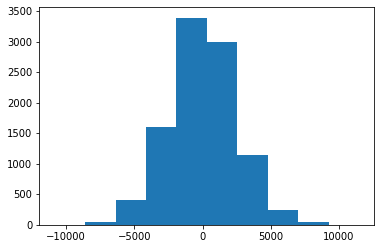

In [249]:
#i want to see how different the distributions of number to see if i want do some standardization or normalization.

#blue gold diff is bell shape or a gaussian distribution.
#what would be my y axis tho.
plt.hist(cleaned_df['blueGoldDiff'])

#plt.plot(cleaned_df['blueGoldDiff'])

(array([  78.,  264.,  739., 1577., 2242., 2298., 1533.,  752.,  255.,
          70.]),
 array([-5726. , -4587.1, -3448.2, -2309.3, -1170.4,   -31.5,  1107.4,
         2246.3,  3385.2,  4524.1,  5663. ]),
 <a list of 10 Patch objects>)

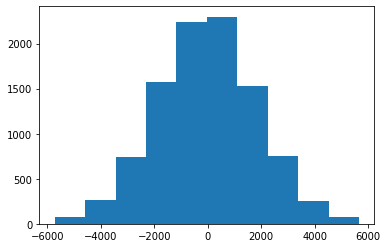

In [183]:
plt.hist(cleaned_df['blueExperienceDiff'])

(array([  53.,  613., 2031., 2838., 2364., 1265.,  470.,  146.,   25.,
           3.]),
 array([12178. , 13293.7, 14409.4, 15525.1, 16640.8, 17756.5, 18872.2,
        19987.9, 21103.6, 22219.3, 23335. ]),
 <a list of 10 Patch objects>)

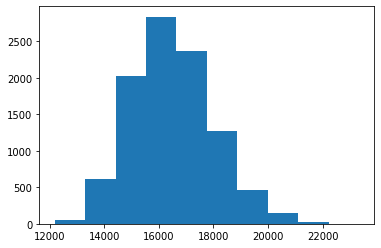

In [184]:
plt.hist(cleaned_df['blueTotalGold'])

In [185]:
#since all of these are in a gaussian distribution, it would be wise to use a standard scaler to scale these 
#values so that they would have an equal amount of impact on our model.
cleaned_df.dtypes

blueGoldDiff                int64
blueExperienceDiff          int64
blueTotalGold               int64
redTotalGold                int64
blueTotalExperience         int64
redTotalExperience          int64
blueGoldPerMin            float64
redGoldPerMin             float64
blueTotalMinionsKilled      int64
redTotalMinionsKilled       int64
dtype: object

In [276]:
#we are going to make our testing size about twenty percent of our data. I chose twenty percent because I don't
#want our testing data to be too small, nor would i want my training data to be too small as well. I thought that
# 0.2 would be a very optimal value, since twenty percent would still be about 1.5 thousand observations to test on.
X_train, X_test, y_train, y_test = train_test_split(cleaned_df, y, test_size=0.2)

In [255]:
X_train

,blueGoldDiff,blueExperienceDiff,redDragons,blueDragons,blueHeralds,redHeralds,blueTowersDestroyed,redTowersDestroyed,redKills,blueKills
8240,34,985,1,0,0,0,0,0,6,6
1860,-2803,-1709,1,0,0,0,0,0,11,4
7064,-1761,-1446,0,0,0,0,0,0,10,6
5980,1062,445,1,0,1,0,0,0,7,8
1064,236,-37,1,0,0,0,0,0,3,3
...,...,...,...,...,...,...,...,...,...,...
1215,-413,-1004,0,1,0,1,0,0,5,6
6526,-1624,-1067,1,0,0,0,0,0,9,5
2585,1159,1510,0,1,0,0,0,0,3,7
7359,3613,3509,0,0,1,0,0,0,2,8


# Simple baseline

In [302]:
#simple baseline model





simple = Pipeline(steps = [ ('regressor', RandomForestClassifier(max_depth = 20))])

simple.fit(X_train,y_train)


C:\Users\Jason Chau\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Pipeline(memory=None,
         steps=[('regressor',
                 RandomForestClassifier(bootstrap=True, class_weight=None,
                                        criterion='gini', max_depth=20,
                                        max_features='auto',
                                        max_leaf_nodes=None,
                                        min_impurity_decrease=0.0,
                                        min_impurity_split=None,
                                        min_samples_leaf=1, min_samples_split=2,
                                        min_weight_fraction_leaf=0.0,
                                        n_estimators=10, n_jobs=None,
                                        oob_score=False, random_state=None,
                                        verbose=0, warm_start=False))],
         verbose=False)

In [303]:
y_pred =  simple.predict(X_test)

accuracy_score(y_test, y_pred)

0.6954087346024636

In [233]:
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix is %s"%cm)

Confusion Matrix is [[687 282]
 [308 685]]


# final model

In [331]:
#final model.


ohe = Pipeline(steps = [('ohe', OneHotEncoder(handle_unknown='ignore'))])

scaler = Pipeline(steps = [('scaler', StandardScaler())])
preproc = ColumnTransformer(transformers = 
                            [('scaled',scaler, ['blueGoldDiff','blueExperienceDiff','redDragons','blueDragons',
                                                'blueHeralds','redHeralds','blueTowersDestroyed','redTowersDestroyed',
                                                'redKills','blueKills'])]
                              ,remainder = 'passthrough')


pl = Pipeline(steps = [('preprocessing', preproc), ('regressor', xgb.XGBClassifier(n_estimators = 100, max_depth =3))])

pl.fit(X_train,y_train)

Pipeline(memory=None,
         steps=[('preprocessing',
                 ColumnTransformer(n_jobs=None, remainder='passthrough',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('scaled',
                                                  Pipeline(memory=None,
                                                           steps=[('scaler',
                                                                   StandardScaler(copy=True,
                                                                                  with_mean=True,
                                                                                  with_std=True))],
                                                           verbose=False),
                                                  ['blueGoldDiff',
                                                   'blueExperienceDiff',
                                      

In [332]:
y_pred =pl.predict(X_test)
accuracy_score(y_test, y_pred)

0.7228443449048152

In [304]:
ohe = Pipeline(steps = [('ohe', OneHotEncoder(handle_unknown='ignore'))])

scaler = Pipeline(steps = [('scaler', StandardScaler())])
preproc = ColumnTransformer(transformers = 
                            [('zipcode', ohe, ['room_type','cancellation_policy','city',
                                               'host_identity_verified', 'host_is_superhost','property_type',
                                               'room_type','host_neighbourhood']),('scaled',scaler, ['number_of_reviews',
                                                                                'extra_people','guests_included','reviews_per_month', 'host_response_rate',                                                        
                                                                                'bedrooms','bathrooms','review_scores_rating','accommodates'])],remainder = 'passthrough')


pl = Pipeline(steps = [('preprocessing', preproc), ('regressor', xgb.XGBRegressor())])

pl.fit(cleaned_df,df['price'])



KeyError: 'price'

[382.2335   117.50863   61.300488 ...  72.85978   57.579613 104.05685 ]


In [149]:
output_df = pd.DataFrame()
output_df['Id'] = test_df['id']
output_df['Predicted'] = vals
output_df.to_csv('simple_linear_regression_baseline.csv', index = False)